This Jupyter notebook performs comprehensive exploratory data analysis (EDA) on Scottish police incident data, examining temporal patterns, geographic distributions, service types, priority levels, and resource allocation across 2.8+ million incidents to identify outliers and understand data characteristics for subsequent modeling and analysis.


In [1]:
import pandas as pd

# Load the feather file
df = pd.read_feather('raw_incident_data.feather')

df.head()

ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.

## Initial Checks

In [2]:
# Inspecting the data

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\nFirst few rows:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843693 entries, 0 to 2843692
Data columns (total 10 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   incident_count            int32 
 1   date_created              object
 2   hour_created              int32 
 3   max_final_priority        object
 4   inc_resourced             bool  
 5   scrs_crime_inc            bool  
 6   multi_member_ward         object
 7   datazone                  object
 8   dzone_code                object
 9   service_code_description  object
dtypes: bool(2), int32(2), object(6)
memory usage: 157.3+ MB
None

First few rows:
   incident_count date_created  hour_created max_final_priority  \
0               2   2023-08-11             7             PROMPT   
1               2   2023-02-16            20             PROMPT   
2               2   2024-09-05             0           STANDARD   
3               2   2024-09-02            14             PROMPT   

In [3]:
# Count unique service code descriptions
unique_services = df['service_code_description'].nunique()
print(f"Number of unique service code descriptions: {unique_services}")

# Display all unique service code descriptions
print("\nUnique service code descriptions:")
print(df['service_code_description'].unique())


Number of unique service code descriptions: 90

Unique service code descriptions:
['ROAD TRAFFIC COLLISION' 'ASSIST MEMBER OF THE PUBLIC' 'THEFT'
 'EXTERNAL AGENCY REQUEST' 'ROAD TRAFFIC OFFENCE' 'ROBBERY'
 'SEXUAL OFFENCE' 'SUDDEN DEATH' 'SUSPECT PERSONS' 'SUSPICIOUS INCIDENT'
 'TASK INCIDENT' 'UTILITIES INCIDENT' 'VEHICLE CRIME' 'WILDLIFE CRIME'
 'ABANDONED VEHICLES' 'ABANDONED/SILENT 999 CALL'
 'ABDUCTION/EXTORTION/SEXTORTION' 'ANIMALS' 'ASSAULT' 'AUDIBLE ONLY'
 'BAIL/CURFEW/ADDRESS CHECKS' 'CHILD PROTECTION' 'COMMUNICATIONS'
 'CONCERN FOR PERSON' 'DAMAGE' 'DISTURBANCE' 'DOMESTIC BAIL CHECK'
 'DOMESTIC INCIDENT' 'DRUGS/SUBSTANCE MISUSE' 'DUPLICATE INCIDENT' 'ERROR'
 'EXTERNAL FORCE REQUEST' 'FALSE CALL' 'FIREARMS INCIDENT' 'FIRES'
 'FORENSIC EXAMINATION' 'FRAUD INCIDENT' 'HATE CRIME' 'HOUSEBREAKING'
 'INTRUDER' 'LOST/FOUND PROPERTY' 'MESSAGE FOR DELIVERY'
 'MISSING PERSON/ABSCONDER' 'NEIGHBOUR DISPUTE' 'NOISE'
 'PLANNED SHOOT / PEST CONTROL' 'POLICE GENERATED ACTIVITY'
 'POLICE INFO

In [5]:
# Print column names
print("Column names in the dataset:")
for col in df.columns:
    print(col)


Column names in the dataset:
incident_count
date_created
hour_created
max_final_priority
inc_resourced
scrs_crime_inc
multi_member_ward
datazone
dzone_code
service_code_description


In [6]:
# What are the data types of the variables?

print(df.dtypes)

incident_count               int32
date_created                object
hour_created                 int32
max_final_priority          object
inc_resourced                 bool
scrs_crime_inc                bool
multi_member_ward           object
datazone                    object
dzone_code                  object
service_code_description    object
dtype: object


In [2]:
# Adjusting the data types of the variables

# --- 1. Convert date_created to datetime ---
df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')

# --- 2. Convert relevant columns to categorical ---
categorical_cols = [
    'max_final_priority',
    'multi_member_ward',
    'datazone',
    'dzone_code',
    'service_code_description'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [4]:
# running checks to ensure the data is sensible
# Check ranges for numeric columns
print("\nChecking ranges for numeric columns:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Mean: {df[col].mean():.2f}")

# Check ranges for datetime column
print("\nChecking date range:")
print(f"Earliest date: {df['date_created'].min()}")
print(f"Latest date: {df['date_created'].max()}")

# Check unique values in categorical columns
print("\nChecking unique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Unique values:")
    print(df[col].unique())



Checking ranges for numeric columns:

Checking date range:
Earliest date: 2022-04-01 00:00:00
Latest date: 2025-03-31 00:00:00

Checking unique values in categorical columns:

max_final_priority:
Number of unique values: 3
Unique values:
['PROMPT', 'STANDARD', 'IMMEDIATE']
Categories (3, object): ['IMMEDIATE', 'PROMPT', 'STANDARD']

multi_member_ward:
Number of unique values: 354
Unique values:
['Dennistoun', 'Lochee', 'Leith Walk', 'Almond', 'Paisley North West', ..., 'Tay Bridgehead', 'The Ferry', 'Thorniewood', 'Thurso and Northwest Caithness', 'Tillydrone/Seaton/Old Aberdeen']
Length: 354
Categories (354, object): ['Abbey', 'Aboyne, Upper Deeside and Donside', 'Aird and Loch Ness', 'Airdrie Central', ..., 'Westhill and District', 'Whitburn and Blackburn', 'Wick and East Caithness', 'Wishaw']

datazone:
Number of unique values: 6761
Unique values:
['Carntyne West and Haghill - 03', 'Charleston - 04', 'South Leith - 05', 'Ratho, Ingliston and Gogar - 01', 'Paisley North - 06', ..., 

In [5]:
print(df.dtypes)

incident_count                       int32
date_created                datetime64[ns]
hour_created                         int32
max_final_priority                category
inc_resourced                         bool
scrs_crime_inc                        bool
multi_member_ward                 category
datazone                          category
dzone_code                        category
service_code_description          category
dtype: object


In [10]:
# Save the processed dataframe to a pickle file
# Using pickle format as it preserves data types and is efficient for large datasets
df.to_pickle('processed_data_v1.pkl')

## Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

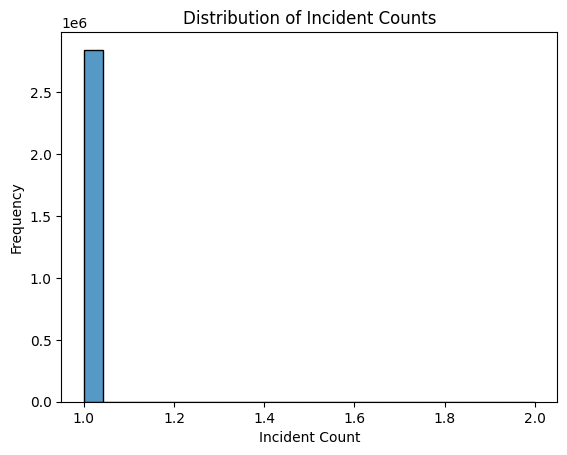

incident_count
1    2843686
2          7
Name: count, dtype: int64

In [21]:
# Univariate Distribution Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['incident_count'])
plt.title('Distribution of Incident Counts')
plt.xlabel('Incident Count')
plt.ylabel('Frequency')
plt.show()

df['incident_count'].value_counts()

Earliest record: 2022-04-01 00:00:00
Latest record: 2025-03-31 00:00:00
Total days covered: 1096

Incident count per day (first 10 days):
 date_created
2022-04-01    2666
2022-04-02    2901
2022-04-03    2633
2022-04-04    2601
2022-04-05    2307
2022-04-06    2416
2022-04-07    2545
2022-04-08    2849
2022-04-09    2797
2022-04-10    2593
Name: count, dtype: int64


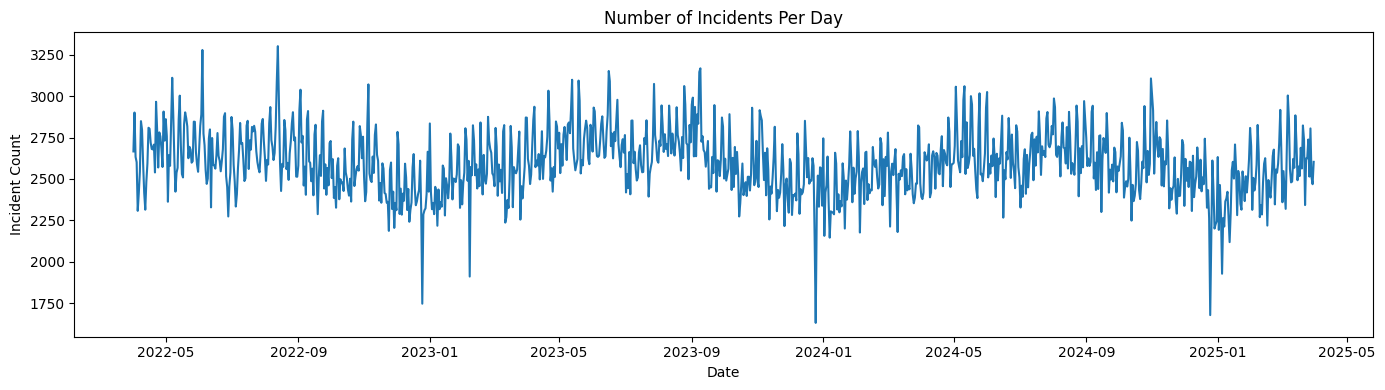

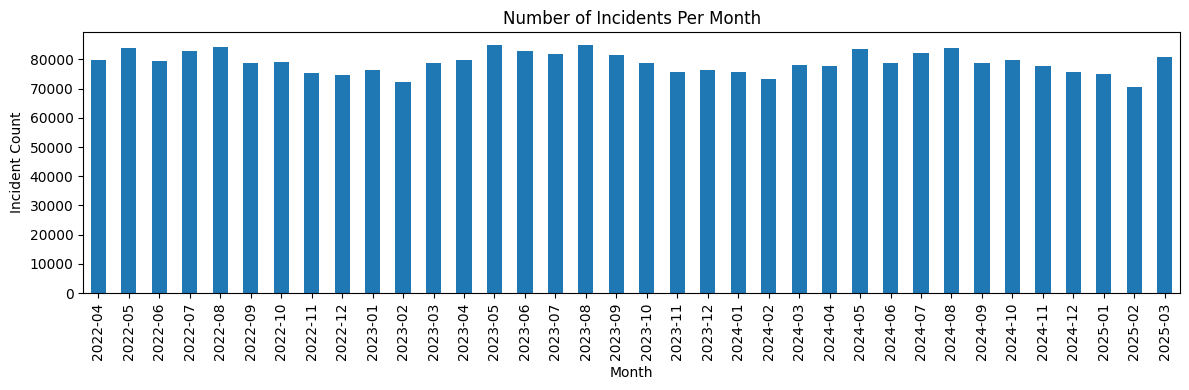

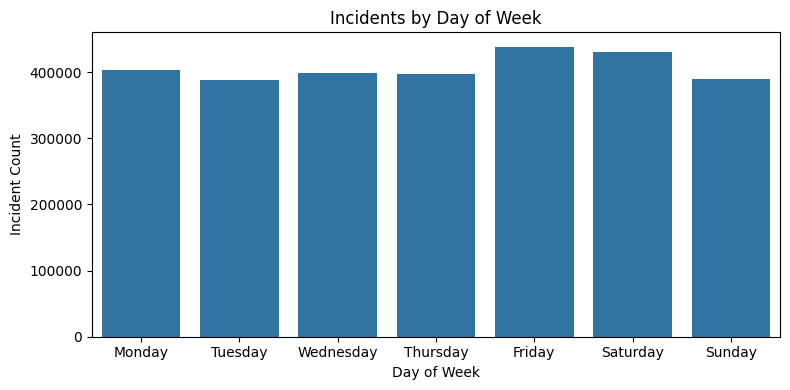

In [23]:
# 1. Summary statistics
min_date = df['date_created'].min()
max_date = df['date_created'].max()
print(f"Earliest record: {min_date}")
print(f"Latest record: {max_date}")
print(f"Total days covered: {(max_date - min_date).days + 1}")

# 2. Number of records per day
daily_counts = df['date_created'].dt.date.value_counts().sort_index()
print("\nIncident count per day (first 10 days):\n", daily_counts.head(10))

plt.figure(figsize=(14, 4))
daily_counts.plot()
plt.title('Number of Incidents Per Day')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.tight_layout()
plt.show()

# 3. Histogram: Records per month (useful if data is long-span)
df['year_month'] = df['date_created'].dt.to_period('M')
monthly_counts = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
monthly_counts.plot(kind='bar')
plt.title('Number of Incidents Per Month')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.tight_layout()
plt.show()

# 4. Day of week analysis
df['day_of_week'] = df['date_created'].dt.day_name()
plt.figure(figsize=(8, 4))
sns.countplot(x='day_of_week', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Incidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Incident Count')
plt.tight_layout()
plt.show()

# Optional: Remove the added columns after analysis
df.drop(['year_month', 'day_of_week'], axis=1, inplace=True)

Summary statistics for hour_created:
Min: 0
Max: 23

Incident counts per hour:
hour_created
0     118754
1      90615
2      67578
3      52960
4      40670
5      32690
6      33618
7      45218
8      71456
9     106606
10    118814
11    133323
12    140827
13    151192
14    162537
15    172963
16    175815
17    174611
18    169956
19    171480
20    168758
21    155743
22    152039
23    135470
Name: count, dtype: int64


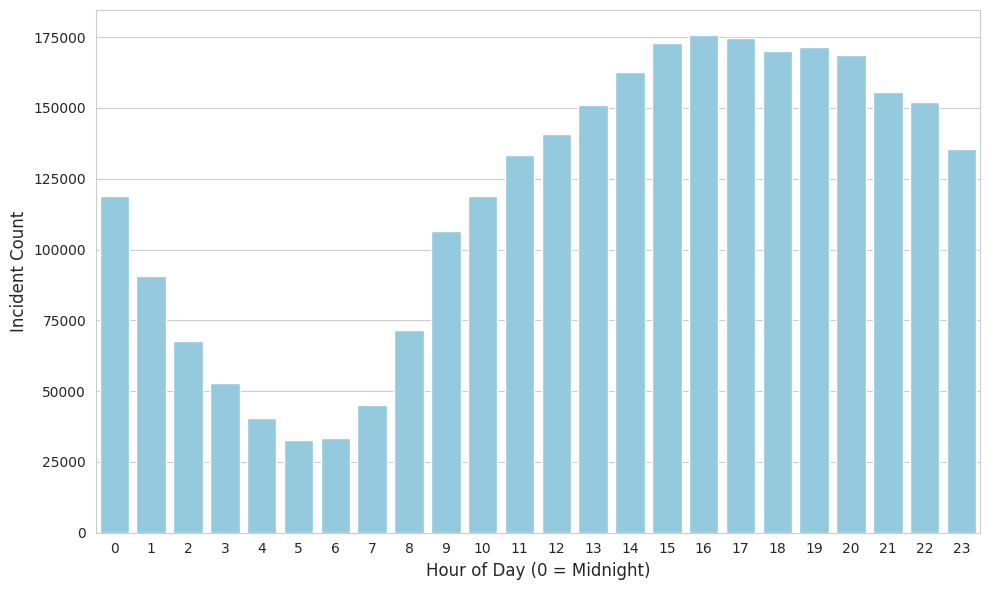

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary statistics
print("Summary statistics for hour_created:")
print("Min:", df['hour_created'].min())
print("Max:", df['hour_created'].max())
print("\nIncident counts per hour:")
hour_counts = df['hour_created'].value_counts().sort_index()
print(hour_counts)

# 2. Bar plot for hour of day
sns.set_style("whitegrid")  # Set a clean seaborn style
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, color='skyblue')
plt.xlabel('Hour of Day (0 = Midnight)', fontsize=12)
plt.ylabel('Incident Count', fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()

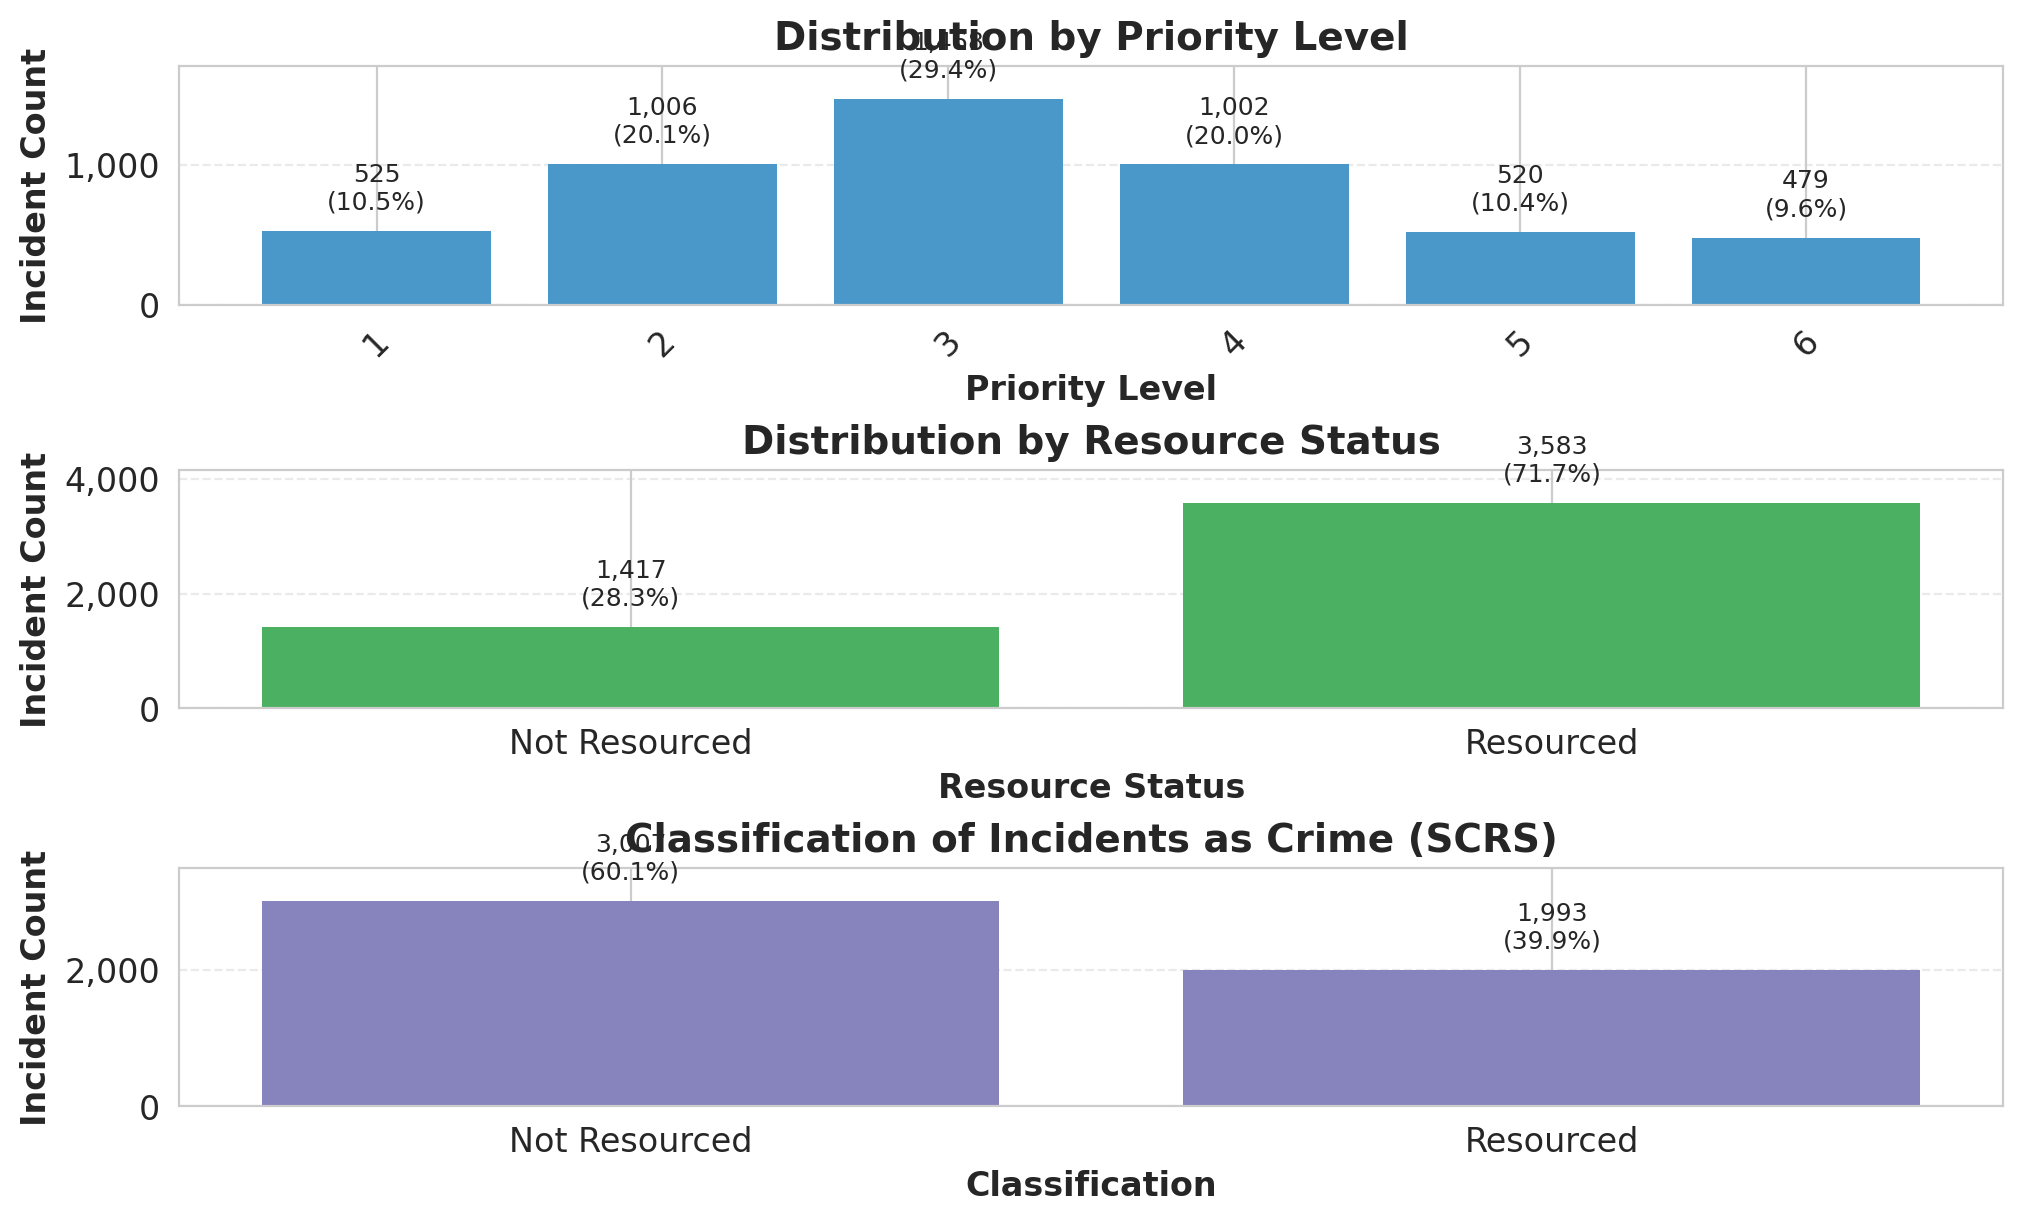

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter

# --- style ---
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titleweight'] = 'bold'

# --- data ---
priority_counts  = df['max_final_priority'].value_counts().sort_index()
resourced_counts = df['inc_resourced'].value_counts().sort_index()
scrs_counts      = df['scrs_crime_inc'].value_counts().sort_index()
n = len(df)

# label map for binary variables
label_map = {
    0: "Not Classified as Crime",
    1: "Classified as Crime",
    False: "Not Resourced",
    True: "Resourced"
}
resourced_labels = [label_map.get(k, str(k)) for k in resourced_counts.index]
scrs_labels      = [label_map.get(k, str(k)) for k in scrs_counts.index]

# helper: format y-axis with commas
fmt_commas = FuncFormatter(lambda x, p: f"{int(x):,}" if x >= 1 else f"{x:.0f}")

def add_value_labels(ax, bars, denom):
    for r in bars:
        h = r.get_height()
        pct = (h / denom * 100) if denom else 0
        ax.annotate(f"{int(h):,}\n({pct:.1f}%)",
                    xy=(r.get_x() + r.get_width()/2, h),
                    xytext=(0, 6), textcoords="offset points",
                    ha="center", va="bottom", fontsize=9)
    ymax = max([b.get_height() for b in bars]) if bars else 0
    ax.set_ylim(0, ymax * 1.16)

# --- create figure ---
fig, axes = plt.subplots(3, 1, figsize=(10, 6), constrained_layout=True, dpi=200)

# --- Plot 1: Priority Levels ---
bars1 = axes[0].bar(priority_counts.index.astype(str),
                    priority_counts.values,
                    color=cm.Blues(0.6), edgecolor="none")
axes[0].set_title('Distribution by Priority Level', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Priority Level', fontsize=12, fontweight='semibold')
axes[0].set_ylabel('Incident Count', fontsize=12, fontweight='semibold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.4)
axes[0].yaxis.set_major_formatter(fmt_commas)
add_value_labels(axes[0], bars1, n)

# --- Plot 2: Resource Status ---
bars2 = axes[1].bar(resourced_labels,
                    resourced_counts.values,
                    color=cm.Greens(0.6), edgecolor="none")
axes[1].set_title('Distribution by Resource Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Resource Status', fontsize=12, fontweight='semibold')
axes[1].set_ylabel('Incident Count', fontsize=12, fontweight='semibold')
axes[1].grid(axis='y', linestyle='--', alpha=0.4)
axes[1].yaxis.set_major_formatter(fmt_commas)
add_value_labels(axes[1], bars2, n)

# --- Plot 3: SCRS Classification ---
bars3 = axes[2].bar(scrs_labels,
                    scrs_counts.values,
                    color=cm.Purples(0.6), edgecolor="none")
axes[2].set_title('Classification of Incidents as Crime (SCRS)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Classification', fontsize=12, fontweight='semibold')
axes[2].set_ylabel('Incident Count', fontsize=12, fontweight='semibold')
axes[2].grid(axis='y', linestyle='--', alpha=0.4)
axes[2].yaxis.set_major_formatter(fmt_commas)
add_value_labels(axes[2], bars3, n)

plt.show()

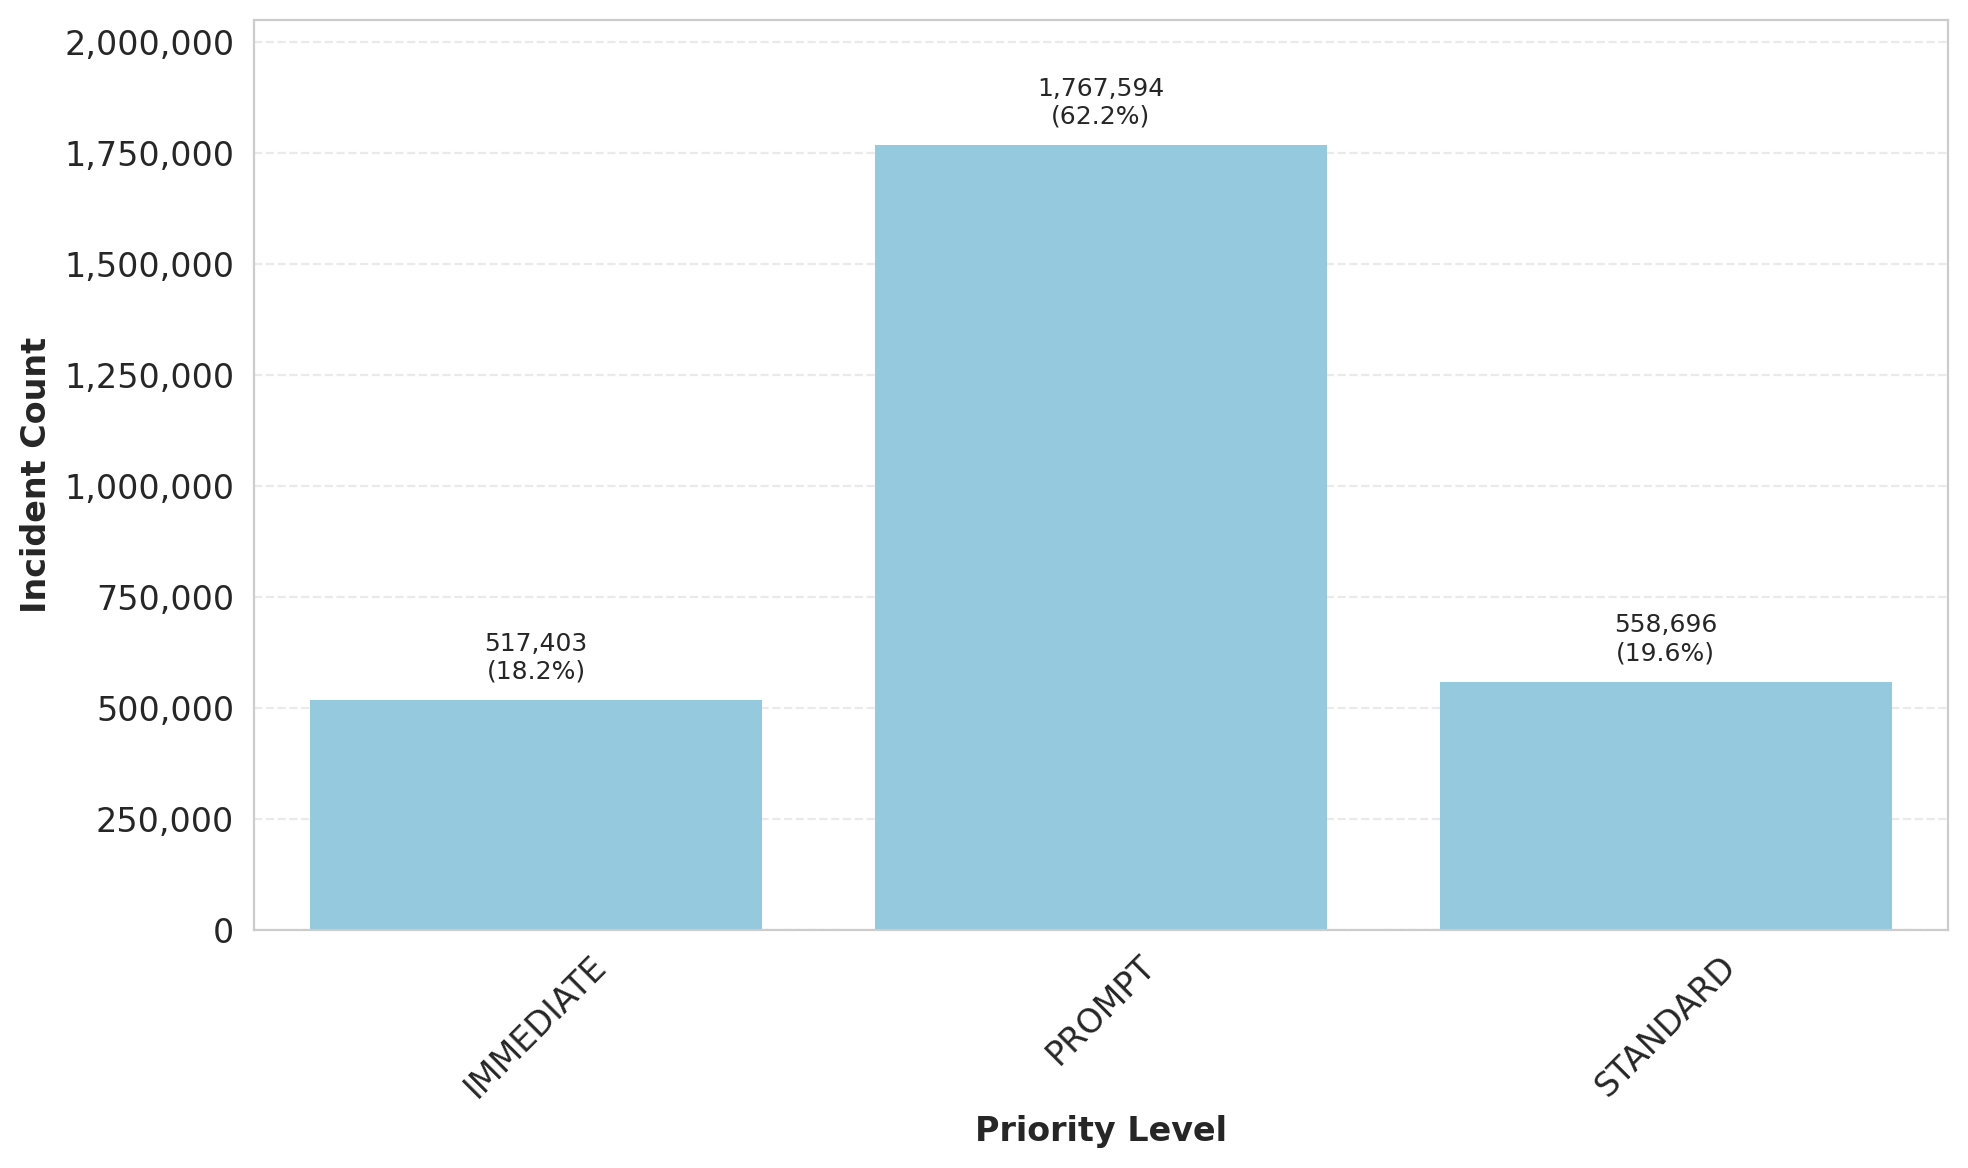

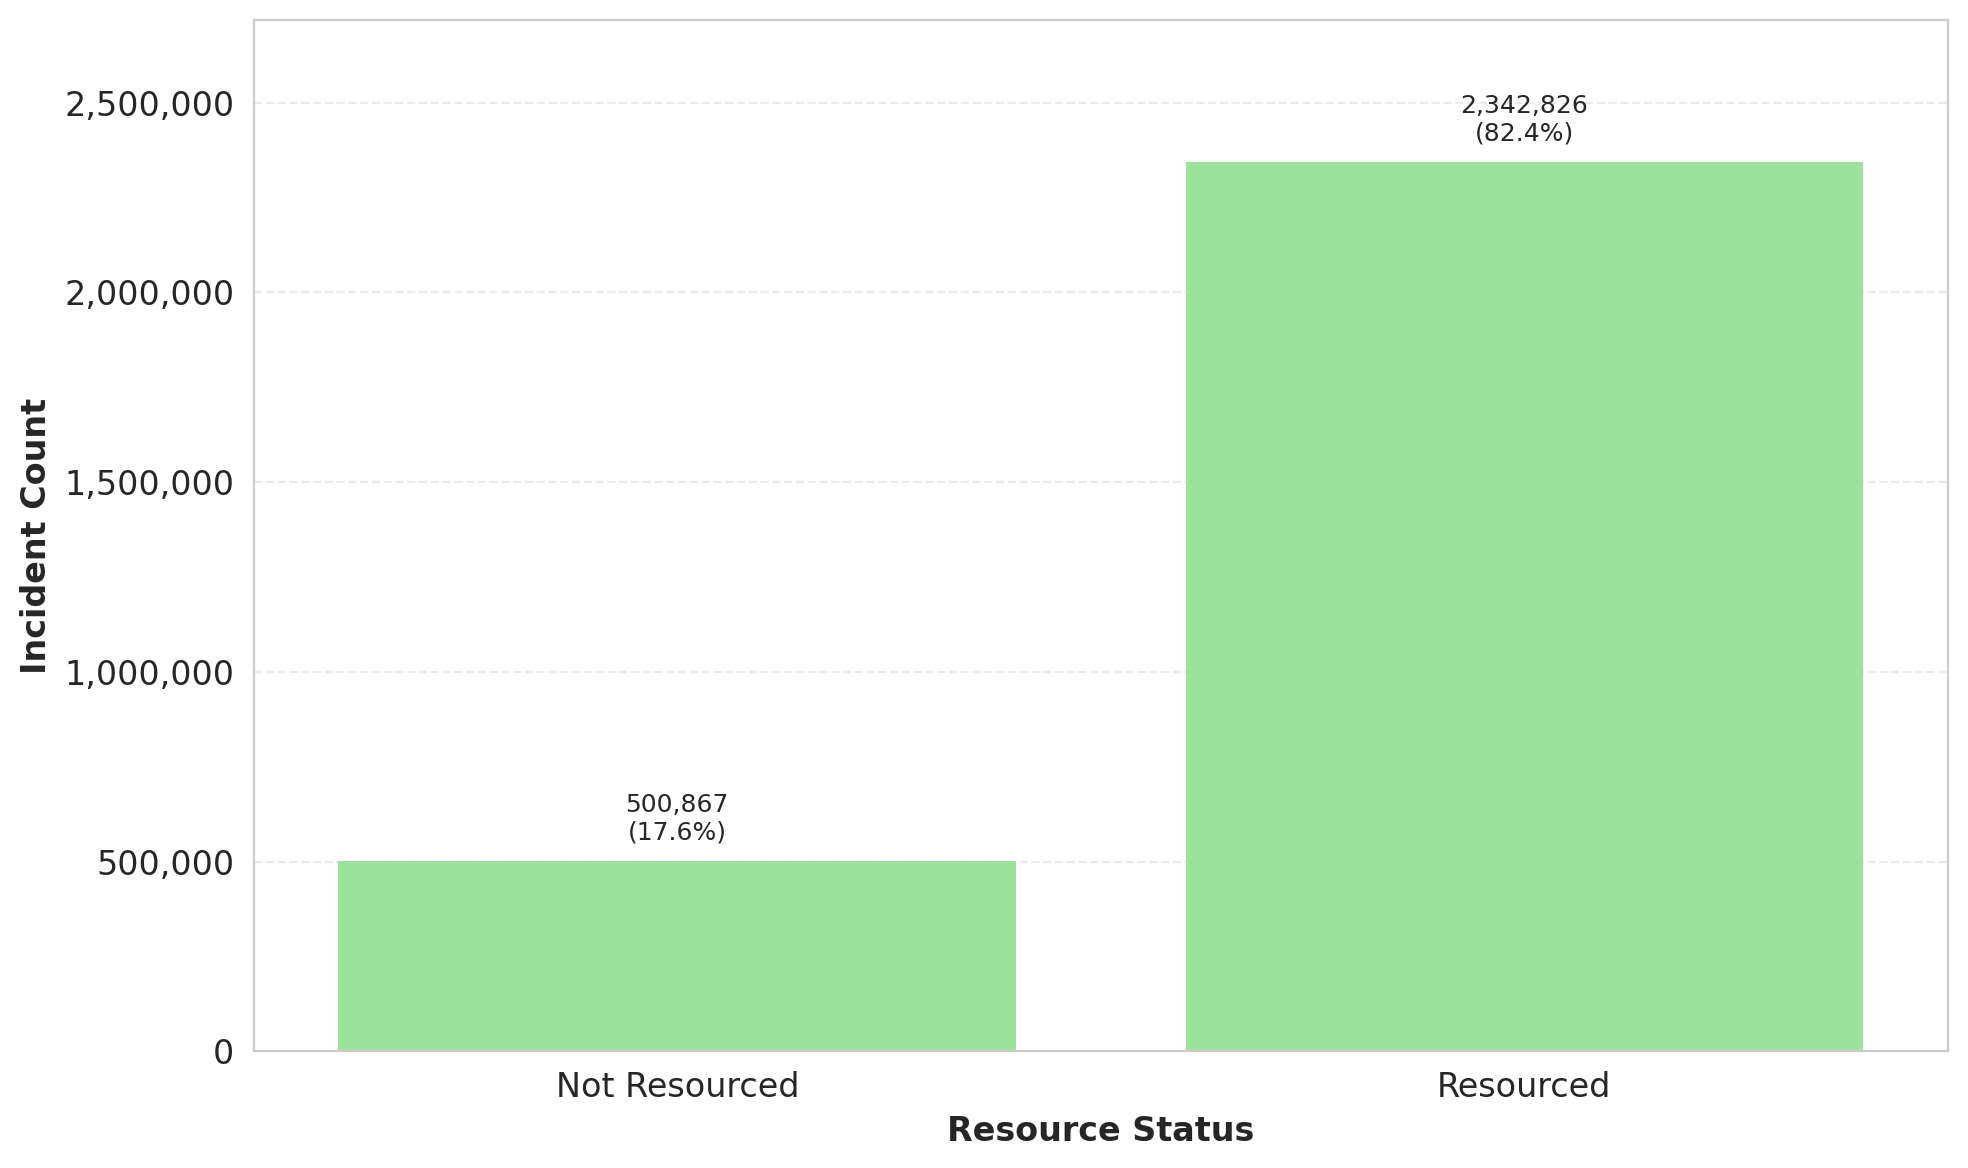

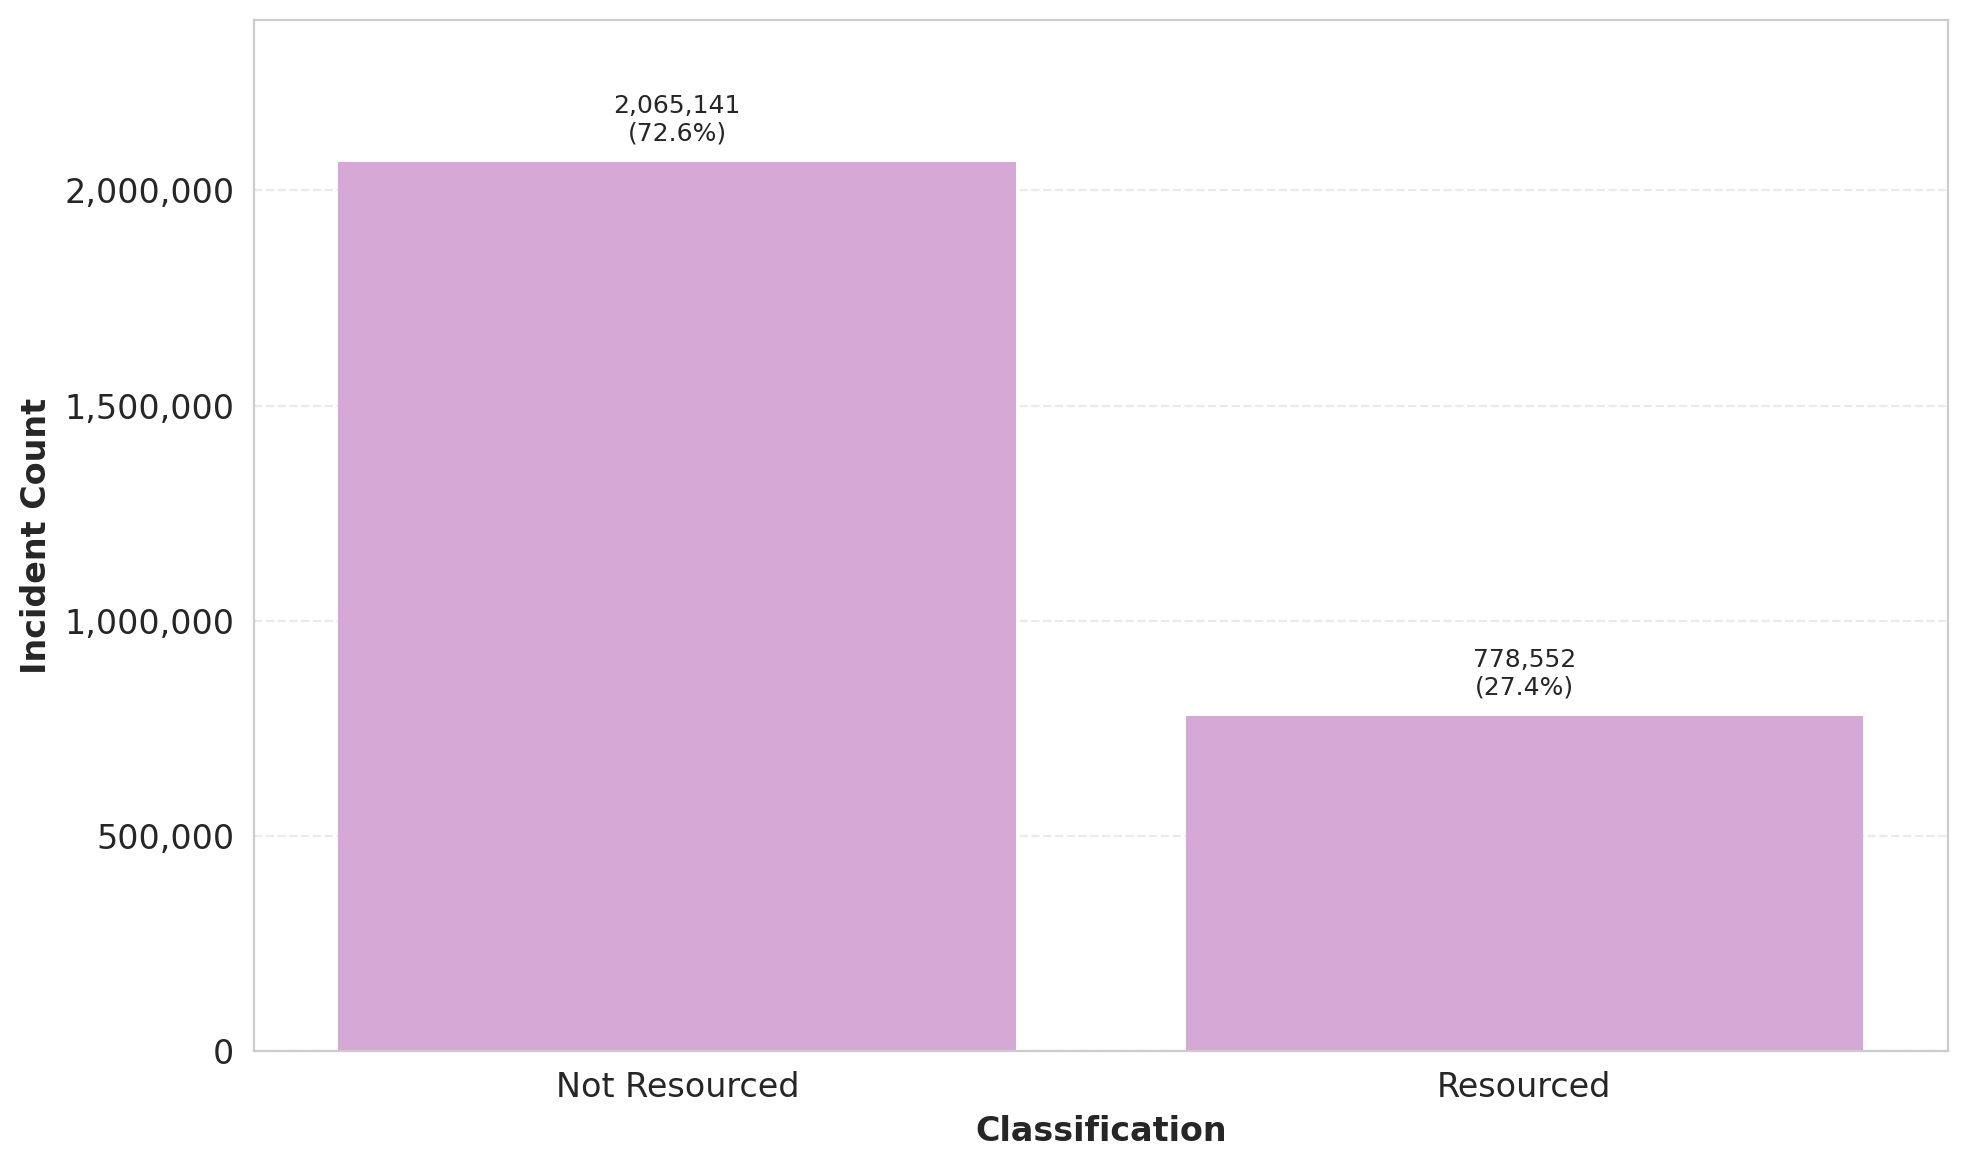

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter


# --- style ---
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titleweight'] = 'bold'

# --- data ---
priority_counts = df['max_final_priority'].value_counts().sort_index()
resourced_counts = df['inc_resourced'].value_counts().sort_index()
scrs_counts = df['scrs_crime_inc'].value_counts().sort_index()
n = len(df)

# label map for binary variables
label_map = {
    0: "Not Classified as Crime",
    1: "Classified as Crime",
    False: "Not Resourced",
    True: "Resourced"
}
resourced_labels = [label_map.get(k, str(k)) for k in resourced_counts.index]
scrs_labels = [label_map.get(k, str(k)) for k in scrs_counts.index]

# helper: format y-axis with commas
fmt_commas = FuncFormatter(lambda x, p: f"{int(x):,}" if x >= 1 else f"{x:.0f}")

def add_value_labels(ax, denom):
    for r in ax.patches:
        h = r.get_height()
        pct = (h / denom * 100) if denom else 0
        ax.annotate(f"{int(h):,}\n({pct:.1f}%)",
                    xy=(r.get_x() + r.get_width()/2, h),
                    xytext=(0, 6), textcoords="offset points",
                    ha="center", va="bottom", fontsize=9)
    ymax = max([b.get_height() for b in ax.patches]) if ax.patches else 0
    ax.set_ylim(0, ymax * 1.16)

# --- Plot 1: Priority Levels ---
plt.figure(figsize=(10, 6), dpi=200)
ax1 = sns.barplot(x=priority_counts.index.astype(str),
                  y=priority_counts.values,
                  color='skyblue', edgecolor="none")
# ax1.set_title('Distribution by Priority Level', fontsize=14, fontweight='bold')
ax1.set_xlabel('Priority Level', fontsize=12, fontweight='semibold')
ax1.set_ylabel('Incident Count', fontsize=12, fontweight='semibold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax1.yaxis.set_major_formatter(fmt_commas)
add_value_labels(ax1, n)
plt.tight_layout()

# --- Plot 2: Resource Status ---
plt.figure(figsize=(10, 6), dpi=200)
ax2 = sns.barplot(x=resourced_labels,
                  y=resourced_counts.values,
                  color='lightgreen', edgecolor="none")
# ax2.set_title('Distribution by Resource Status', fontsize=14, fontweight='bold')
ax2.set_xlabel('Resource Status', fontsize=12, fontweight='semibold')
ax2.set_ylabel('Incident Count', fontsize=12, fontweight='semibold')
ax2.grid(axis='y', linestyle='--', alpha=0.4)
ax2.yaxis.set_major_formatter(fmt_commas)
add_value_labels(ax2, n)
plt.tight_layout()

# --- Plot 3: SCRS Classification ---
plt.figure(figsize=(10, 6), dpi=200)
ax3 = sns.barplot(x=scrs_labels,
                  y=scrs_counts.values,
                  color='plum', edgecolor="none")
# ax3.set_title('Classification of Incidents as Crime (SCRS)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Classification', fontsize=12, fontweight='semibold')
ax3.set_ylabel('Incident Count', fontsize=12, fontweight='semibold')
ax3.grid(axis='y', linestyle='--', alpha=0.4)
ax3.yaxis.set_major_formatter(fmt_commas)
add_value_labels(ax3, n)
plt.tight_layout()


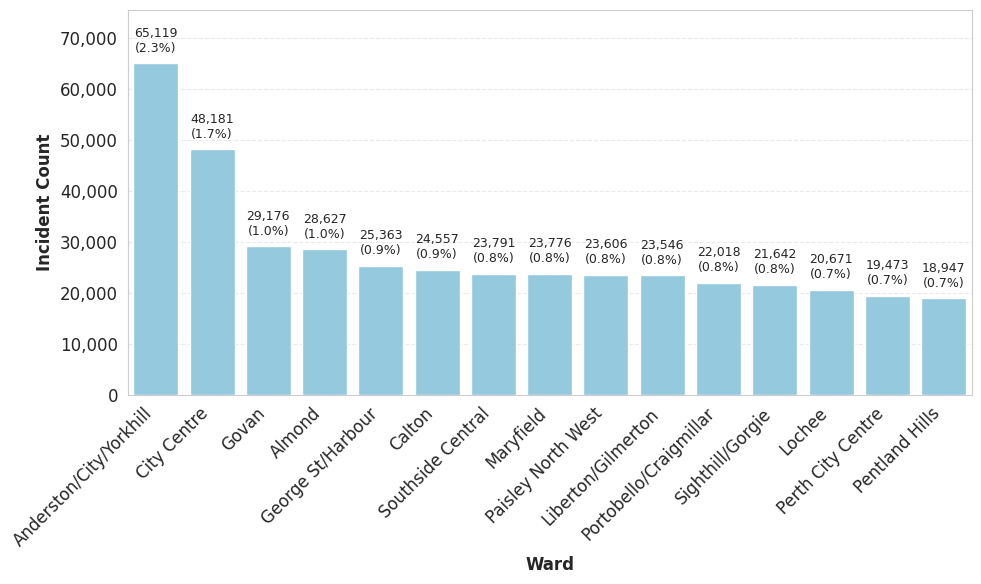

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set a clean seaborn style
sns.set_style("whitegrid")

# --- data ---
top_n = 15
ward_counts = df['multi_member_ward'].value_counts().head(top_n)
n = len(df)  # Total count for percentage calculation

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Use sns.barplot with the axis object
bars = sns.barplot(x=ward_counts.index.astype(str), y=ward_counts.values, color='skyblue', ax=ax)

# Format y-axis with commas
fmt_commas = FuncFormatter(lambda x, p: f"{int(x):,}" if x >= 1 else f"{x:.0f}")
ax.yaxis.set_major_formatter(fmt_commas)

# Labels with semibold weight (from your second snippet)
ax.set_xlabel('Ward', fontsize=12, fontweight='semibold')
ax.set_ylabel('Incident Count', fontsize=12, fontweight='semibold')

# Rotate x-axis labels for readability - fixed method
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add grid on y-axis only with dashed lines
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Define function to add value labels (referenced in your second snippet)
def add_value_labels(ax, total_count):
    # Get all the bars
    bars = [patch for patch in ax.patches]
    for bar in bars:
        height = bar.get_height()
        pct = (height / total_count * 100) if total_count else 0
        ax.annotate(f"{int(height):,}\n({pct:.1f}%)",
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 6), textcoords="offset points",
                    ha="center", va="bottom", fontsize=9)
    
    # Add headroom so labels don't clash with top
    ymax = max([bar.get_height() for bar in bars])
    ax.set_ylim(0, ymax * 1.16)

# Add the value labels
add_value_labels(ax, n)

# Apply tight layout
plt.tight_layout()

# Display the plot
plt.show()

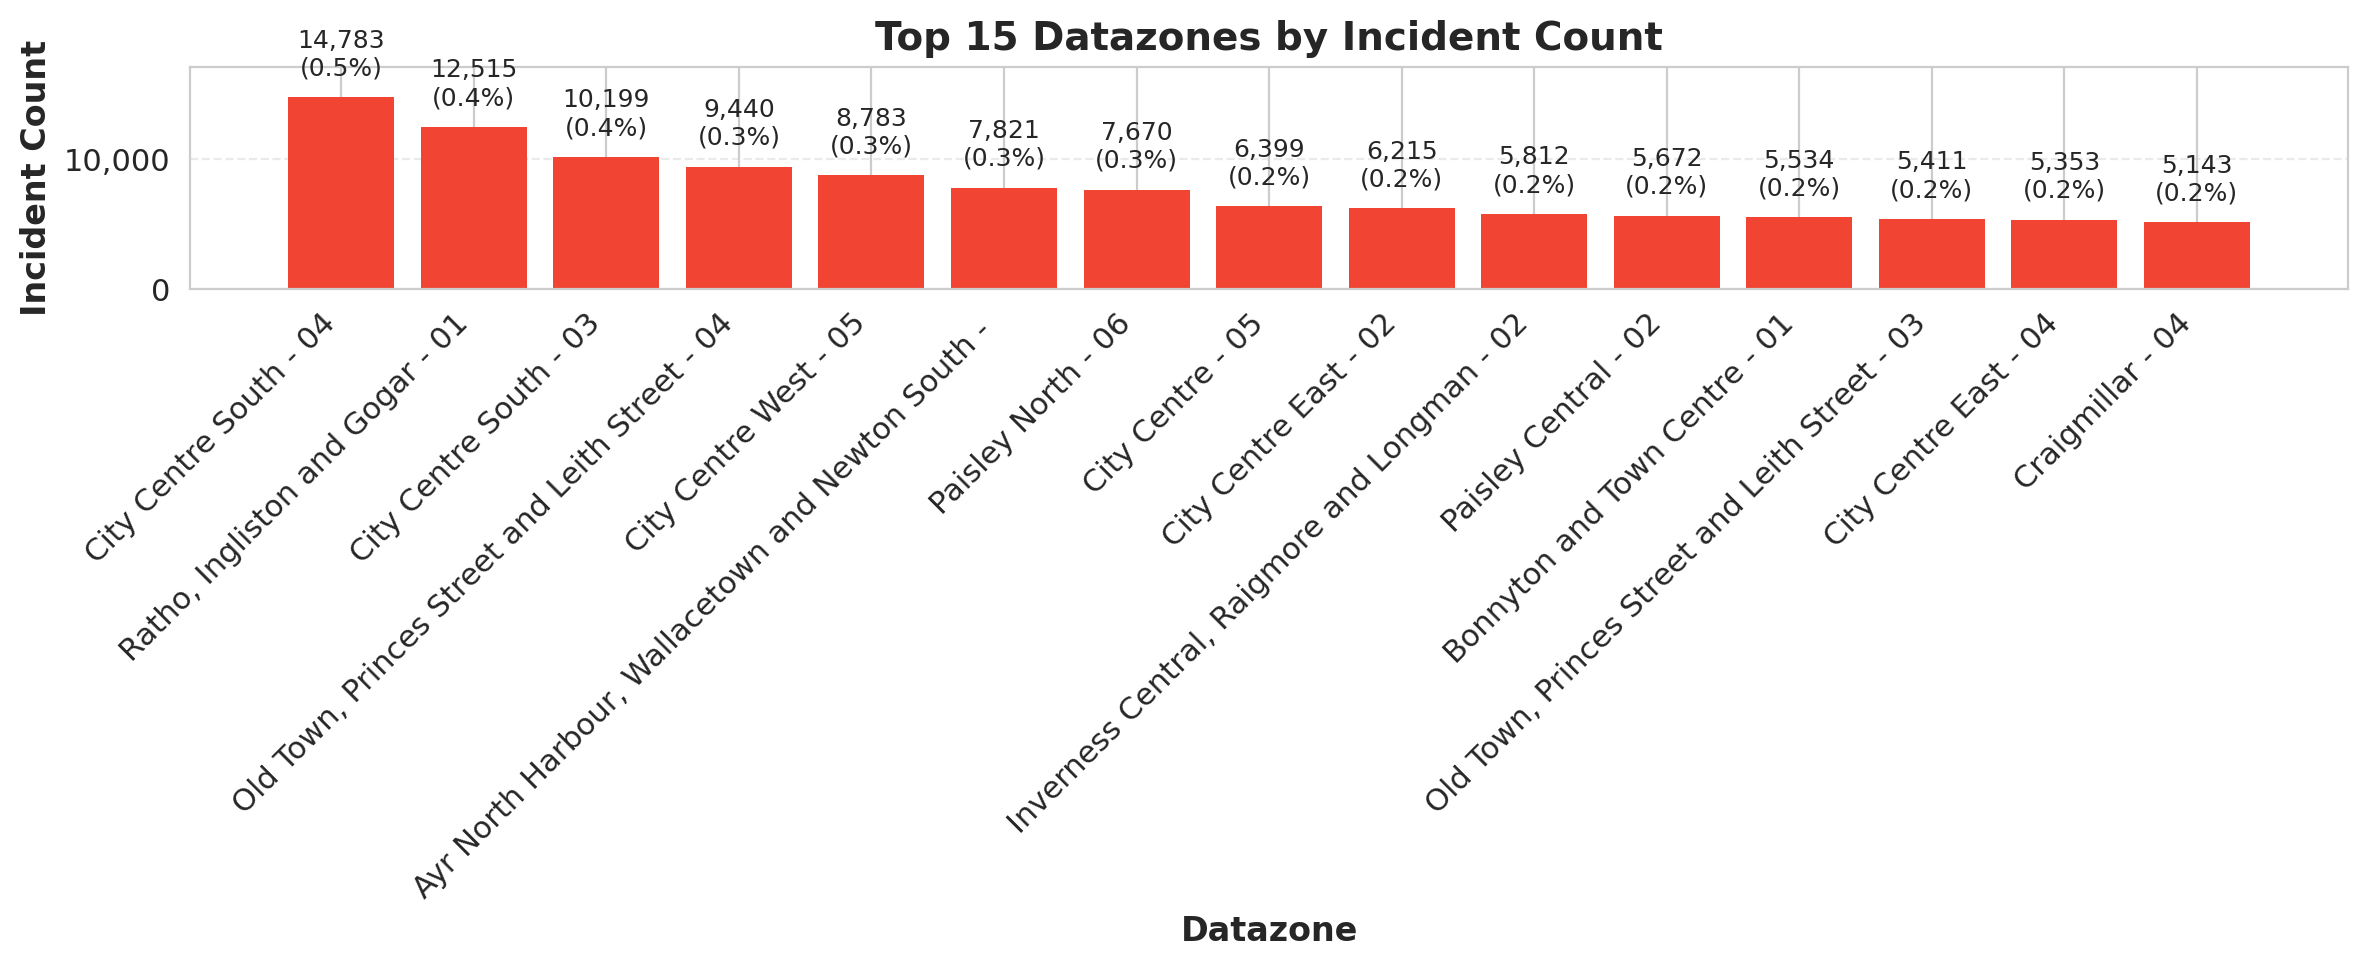

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatterimport matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter

# --- style ---
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titleweight'] = 'bold'

# --- data ---
top_n = 15
ward_counts = df['multi_member_ward'].value_counts().head(top_n)
n = len(df)

# y-axis formatting
fmt_commas = FuncFormatter(lambda x, p: f"{int(x):,}" if x >= 1 else f"{x:.0f}")

plt.figure(figsize=(12, 5), dpi=200)
bars = plt.bar(ward_counts.index.astype(str),
               ward_counts.values,
               color=cm.PuBuGn(0.6),
               edgecolor="none")

# plt.title(f'Top {top_n} Wards by Incident Count', fontsize=14, fontweight='bold')
plt.xlabel('Ward', fontsize=12, fontweight='semibold')
plt.ylabel('Incident Count', fontsize=12, fontweight='semibold')
# plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.gca().yaxis.set_major_formatter(fmt_commas)
plt.xticks(rotation=45, ha="right")

# annotate counts + %
for r in bars:
    h = r.get_height()
    pct = (h / n * 100) if n else 0
    plt.annotate(f"{int(h):,}\n({pct:.1f}%)",
                 xy=(r.get_x() + r.get_width()/2, h),
                 xytext=(0, 6), textcoords="offset points",
                 ha="center", va="bottom", fontsize=9)

# add headroom so labels don’t clash with top
ymax = max([b.get_height() for b in bars])
plt.ylim(0, ymax * 1.16)

plt.tight_layout()
plt.show()

# --- style ---
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titleweight'] = 'bold'

# --- data ---
top_n = 15
ward_counts = df['datazone'].value_counts().head(top_n)
n = len(df)

# y-axis formatting
fmt_commas = FuncFormatter(lambda x, p: f"{int(x):,}" if x >= 1 else f"{x:.0f}")

plt.figure(figsize=(12, 5), dpi=200)
bars = plt.bar(ward_counts.index.astype(str),
               ward_counts.values,
               color=cm.Reds(0.6),
               edgecolor="none")

plt.title(f'Top {top_n} Datazones by Incident Count', fontsize=14, fontweight='bold')
plt.xlabel('Datazone', fontsize=12, fontweight='semibold')
plt.ylabel('Incident Count', fontsize=12, fontweight='semibold')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.gca().yaxis.set_major_formatter(fmt_commas)
plt.xticks(rotation=45, ha="right")

# annotate counts + %
for r in bars:
    h = r.get_height()
    pct = (h / n * 100) if n else 0
    plt.annotate(f"{int(h):,}\n({pct:.1f}%)",
                 xy=(r.get_x() + r.get_width()/2, h),
                 xytext=(0, 6), textcoords="offset points",
                 ha="center", va="bottom", fontsize=9)

# add headroom for annotations
ymax = max([b.get_height() for b in bars])
plt.ylim(0, ymax * 1.16)

plt.tight_layout()
plt.show()


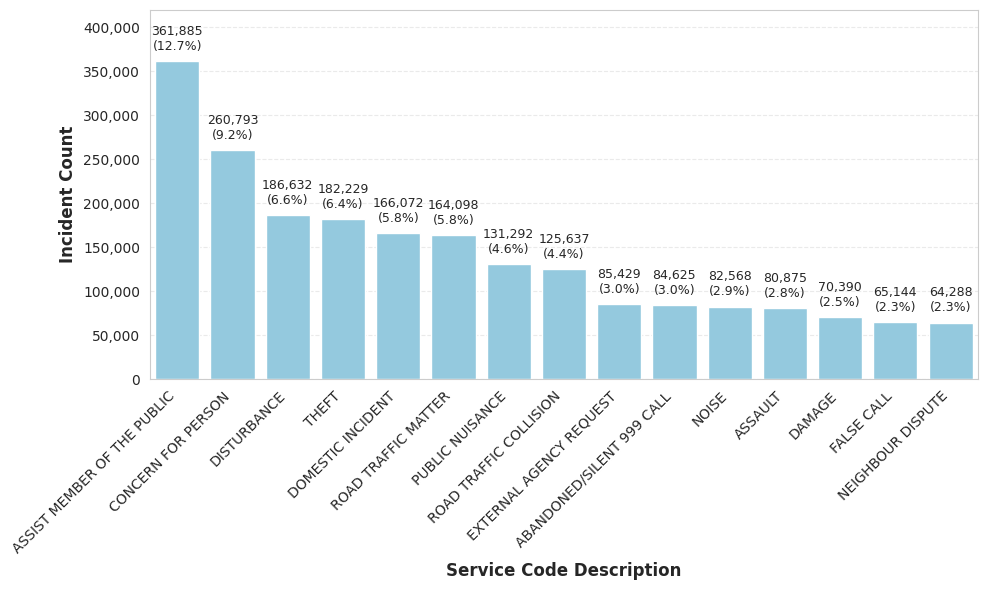

Other categories (n=75): 731,736
                              count    percent  cumulative_percent
service_code_description                                          
ASSIST MEMBER OF THE PUBLIC  361885  12.725881           12.725881
CONCERN FOR PERSON           260793   9.170927           21.896808
DISTURBANCE                  186632   6.563015           28.459823
THEFT                        182229   6.408181           34.868004
DOMESTIC INCIDENT            166072   5.840012           40.708016
ROAD TRAFFIC MATTER          164098   5.770595           46.478611
PUBLIC NUISANCE              131292   4.616954           51.095565
ROAD TRAFFIC COLLISION       125637   4.418093           55.513658
EXTERNAL AGENCY REQUEST       85429   3.004157           58.517815
ABANDONED/SILENT 999 CALL     84625   2.975884           61.493699
NOISE                         82568   2.903548           64.397247
ASSAULT                       80875   2.844013           67.241260
DAMAGE                       

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set a clean seaborn style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titleweight'] = 'bold'
# --- data ---
top_n = 15
vc = df['service_code_description'].value_counts()
vc_top = vc[:top_n]
vc_rest = vc[top_n:].sum()
n = len(df)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Use sns.barplot with the axis object
bars = sns.barplot(x=vc_top.index.astype(str), y=vc_top.values, color='skyblue', ax=ax)

# Format y-axis with commas
fmt_commas = FuncFormatter(lambda x, p: f"{int(x):,}" if x >= 1 else f"{x:.0f}")
ax.yaxis.set_major_formatter(fmt_commas)

# Add title and labels with proper formatting
# ax.set_title(f"Top {top_n} Service Codes by Incident Count", fontsize=14, fontweight='bold')
ax.set_xlabel('Service Code Description', fontsize=12, fontweight='semibold')
ax.set_ylabel('Incident Count', fontsize=12, fontweight='semibold')

# Rotate x-axis labels for readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add grid on y-axis only with dashed lines
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Define function to add value labels
def add_value_labels(ax, total_count):
    # Get all the bars
    bars = [patch for patch in ax.patches]
    for bar in bars:
        height = bar.get_height()
        pct = (height / total_count * 100) if total_count else 0
        ax.annotate(f"{int(height):,}\n({pct:.1f}%)",
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 6), textcoords="offset points",
                    ha="center", va="bottom", fontsize=9)
    
    # Add headroom so labels don't clash with top
    ymax = max([bar.get_height() for bar in bars])
    ax.set_ylim(0, ymax * 1.16)

# Add the value labels
add_value_labels(ax, n)

# Apply tight layout
plt.tight_layout()

# Display the plot
plt.show()

# --- optional: print summary table ---
print(f"Other categories (n={len(vc) - top_n}): {vc_rest:,}")
summary = pd.DataFrame({
    'count': vc,
    'percent': vc / vc.sum() * 100,
    'cumulative_percent': vc.cumsum() / vc.sum() * 100
})
print(summary.head(20))

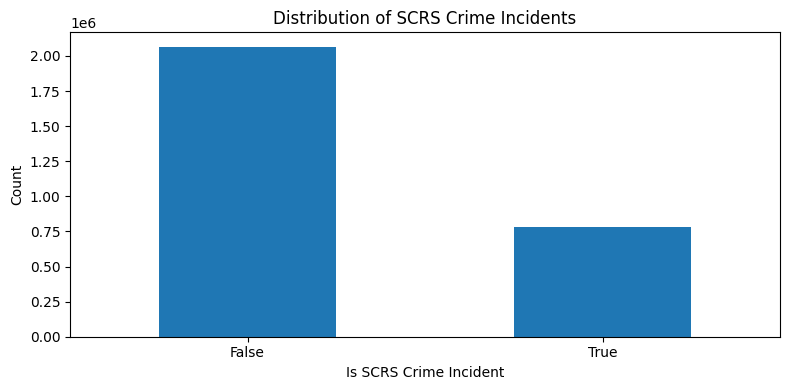


Value counts:
scrs_crime_inc
False    2065141
True      778552
Name: count, dtype: int64


In [31]:
# Plot distribution of scrs_crime_inc
plt.figure(figsize=(8, 4))
df['scrs_crime_inc'].value_counts().plot(kind='bar')
plt.title('Distribution of SCRS Crime Incidents')
plt.xlabel('Is SCRS Crime Incident')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print value counts for reference
print("\nValue counts:")
print(df['scrs_crime_inc'].value_counts())


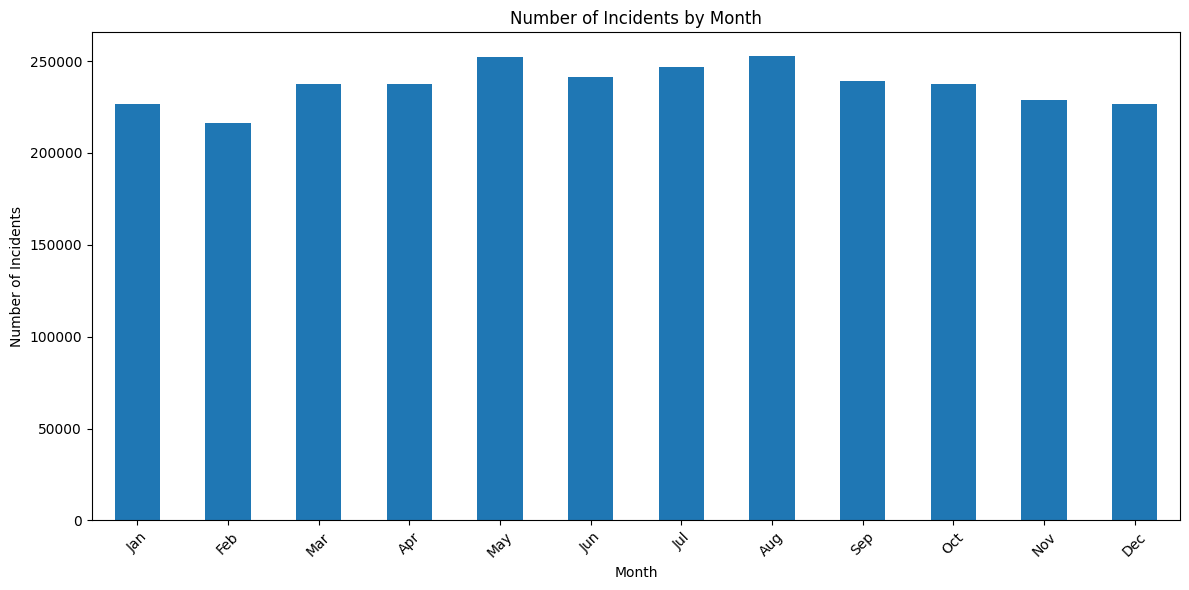


Incidents by month:
date_created
1     226876
2     216212
3     237678
4     237330
5     252462
6     241372
7     246672
8     252980
9     239104
10    237731
11    228805
12    226471
Name: count, dtype: int64


In [32]:
# Extract month from date_created and create bar plot
plt.figure(figsize=(12, 6))
df['date_created'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

# Print the actual counts for reference
print("\nIncidents by month:")
print(df['date_created'].dt.month.value_counts().sort_index())


## Correlation Analysis

### Numeric vs Numeric

In [ ]:
# Pearson correlation
numeric_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

                incident_count  hour_created
incident_count        1.000000     -0.000394
hour_created         -0.000394      1.000000


### Categorical vs Categorical

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to compute Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Correction for bias if applicable
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# List of your categorical columns (including bools)
categorical_cols = [
    'max_final_priority',
    'inc_resourced',
    'scrs_crime_inc',
    'multi_member_ward',
    'datazone',
    'dzone_code',
    'service_code_description'
]

# Create an empty DataFrame for the results
cramers_matrix = pd.DataFrame(
    np.zeros((len(categorical_cols), len(categorical_cols))),
    columns=categorical_cols, index=categorical_cols
)

# Compute Cramér’s V for each pair
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0  # Cramér’s V with self is 1
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

print("Cramér’s V Association Matrix:")
print(cramers_matrix.round(3))


Cramér’s V Association Matrix:
                          max_final_priority  inc_resourced  scrs_crime_inc  \
max_final_priority                     1.000          0.517           0.364   
inc_resourced                          0.517          1.000           0.239   
scrs_crime_inc                         0.364          0.239           1.000   
multi_member_ward                      0.096          0.089           0.109   
datazone                               0.167          0.171           0.184   
dzone_code                             0.168          0.173           0.185   
service_code_description               0.542          0.526           0.713   

                          multi_member_ward  datazone  dzone_code  \
max_final_priority                    0.096     0.167       0.168   
inc_resourced                         0.089     0.171       0.173   
scrs_crime_inc                        0.109     0.184       0.185   
multi_member_ward                     1.000     0.955       

### Numeric vs Categorical

In [9]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Identify categorical and numeric columns
cat_cols = df.select_dtypes(include=['category', 'bool']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Initialize results DataFrame
mi_matrix = pd.DataFrame(index=cat_cols, columns=num_cols)

for cat in cat_cols:
    y = df[cat].astype('category').cat.codes
    for num in num_cols:
        X = df[[num]]
        # Some columns may have NaNs; fill or drop as needed
        mask = X[num].notnull() & pd.notnull(y)
        # Must have >1 class in target to compute MI
        if y[mask].nunique() > 1 and X[num][mask].nunique() > 1:
            mi = mutual_info_classif(X[mask], y[mask], discrete_features=False, random_state=0)
            mi_matrix.loc[cat, num] = mi[0]
        else:
            mi_matrix.loc[cat, num] = 0.0

# Display as float
mi_matrix = mi_matrix.astype(float)
print("Mutual Information between Categorical (target) and Numeric (feature) columns:")
print(mi_matrix.round(4))


Mutual Information between Categorical (target) and Numeric (feature) columns:
                          incident_count  hour_created
max_final_priority                0.2500        0.0410
inc_resourced                     0.2541        0.0336
scrs_crime_inc                    0.2754        0.0242
multi_member_ward                 0.0029        0.0053
datazone                          0.0000        0.0194
dzone_code                        0.0000        0.0200
service_code_description          0.0395        0.0664


In [16]:
df.describe()

,incident_count,date_created,hour_created
count,2.843693e+06,2843693,2.843693e+06
mean,1.000002e+00,2023-09-27 10:50:05.152244736,1.376568e+01
min,1.000000e+00,2022-04-01 00:00:00,0.000000e+00
25%,1.000000e+00,2022-12-29 00:00:00,1.000000e+01
50%,1.000000e+00,2023-09-23 00:00:00,1.500000e+01
75%,1.000000e+00,2024-06-28 00:00:00,1.900000e+01
max,2.000000e+00,2025-03-31 00:00:00,2.300000e+01
std,1.568943e-03,NaN,6.457293e+00


## Missingness Patterns

In [22]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [28]:
location_col = 'multi_member_ward'
missing_by_loc = df.groupby(location_col)['datazone'].apply(lambda x: x.isnull().mean())

# Show only wards that have missing datazone values
print("Proportion of missing value corresponding to each multi member ward ")
print(missing_by_loc[missing_by_loc > 0])


Proportion of missing value corresponding to each multi member ward 
multi_member_ward
Baillieston                         0.000111
Banchory and Mid Deeside            0.000328
Bearsden South                      0.000421
Bridge of Don                       0.000213
Broxburn, Uphall and Winchburgh     0.000097
Buckie                              0.000190
City Centre                         0.000021
Coldside                            0.000054
Denny and Banknock                  0.000124
Dyce/Bucksburn/Danestone            0.000085
East Garioch                        0.000290
Haddington and Lammermuir           0.000120
Inverness West                      0.000150
Kirkcaldy East                      0.000056
Liberton/Gilmerton                  0.000042
Maryfield                           0.000042
Musselburgh                         0.000076
Newlands/Auldburn                   0.000076
Newton Mearns North and Neilston    0.000211
North Kincardine                    0.000224
Partick East/

/tmp/dcs-tmp.u2164966/ipykernel_65699/3470786512.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_loc = df.groupby(location_col)['datazone'].apply(lambda x: x.isnull().mean())


## Outlier and Anomaly Detction

In [29]:
import pandas as pd

# Assuming df is your DataFrame

# Calculate value counts and normalize to get proportions
ward_proportions = df['multi_member_ward'].value_counts(normalize=True)

# Define a threshold for rarity (e.g., categories appearing less than 0.1% of the time)
rarity_threshold = 0.001 # 0.1%

# Identify rare wards
rare_wards = ward_proportions[ward_proportions < rarity_threshold]

print("Proportion of each 'multi_member_ward' category:")
print(ward_proportions)
print(f"\nRare 'multi_member_ward' categories (appearing less than {rarity_threshold*100}% of the time):")
print(rare_wards)

# You can then get the actual rows corresponding to these rare wards
outlier_rows_wards = df[df['multi_member_ward'].isin(rare_wards.index)]
print(f"\nNumber of incidents in rare wards: {len(outlier_rows_wards)}")
# print(outlier_rows_wards.head()) # Uncomment to see the actual outlier rows

Proportion of each 'multi_member_ward' category:
multi_member_ward
Anderston/City/Yorkhill                  0.022899
City Centre                              0.016943
Govan                                    0.010260
Almond                                   0.010067
George St/Harbour                        0.008919
                                           ...   
Na Hearadh agus Ceann a Deas nan Loch    0.000114
Shetland West                            0.000104
North Isles - Shetland                   0.000101
Sgire an Rubha                           0.000098
North Isles - Orkney                     0.000094
Name: proportion, Length: 354, dtype: float64

Rare 'multi_member_ward' categories (appearing less than 0.1% of the time):
multi_member_ward
South Kintyre                                   0.000973
Westhill and District                           0.000970
Tweeddale East                                  0.000967
Steornabhagh a Deas                             0.000943
Speyside Glenl

In [30]:
import pandas as pd

# Assuming df is your DataFrame

# Calculate value counts and normalize to get proportions for 'service_code_description'
service_code_proportions = df['service_code_description'].value_counts(normalize=True)

# Define a threshold for rarity (e.g., categories appearing less than 0.1% of the time)
# You might want to adjust this threshold based on the specific distribution of service codes
rarity_threshold = 0.001 # 0.1%

# Identify rare service code descriptions
rare_service_codes = service_code_proportions[service_code_proportions < rarity_threshold]

print("Proportion of each 'service_code_description' category:")
print(service_code_proportions)
print(f"\nRare 'service_code_description' categories (appearing less than {rarity_threshold*100}% of the time):")
print(rare_service_codes)

# You can then get the actual rows corresponding to these rare service codes
outlier_rows_service_codes = df[df['service_code_description'].isin(rare_service_codes.index)]
print(f"\nNumber of incidents with rare service codes: {len(outlier_rows_service_codes)}")
# print(outlier_rows_service_codes.head()) # Uncomment to see the actual outlier rows

Proportion of each 'service_code_description' category:
service_code_description
ASSIST MEMBER OF THE PUBLIC    1.272588e-01
CONCERN FOR PERSON             9.170927e-02
DISTURBANCE                    6.563015e-02
THEFT                          6.408181e-02
DOMESTIC INCIDENT              5.840012e-02
                                   ...     
LONE WORKER                    1.758277e-06
INDUSTRIAL DISPUTE             1.758277e-06
CCTV                           1.406622e-06
CRIME IN PROGRESS              7.033108e-07
POLICE EMERGENCY               3.516554e-07
Name: proportion, Length: 90, dtype: float64

Rare 'service_code_description' categories (appearing less than 0.1% of the time):
service_code_description
INTRUDER                   7.040141e-04
INTERNAL FORCE REQUEST     6.660353e-04
VEHICLE PURSUIT            6.593539e-04
SEARCH AND RESCUE          5.925393e-04
DRONE/UAS/UAV INCIDENT     5.566705e-04
UTILITIES INCIDENT         5.524506e-04
WILDLIFE CRIME             5.285381e-04
I